In [15]:
import pandas as pd

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option("max_colwidth", None)

In [35]:
%%time
articles = pd.read_csv('data/articles.csv', dtype={'article_id': str})

CPU times: user 292 ms, sys: 39.2 ms, total: 331 ms
Wall time: 343 ms


In [4]:
%%time
transactions = pd.read_csv(
    'data/transactions_train.csv',
    usecols=['t_dat', 'customer_id', 'article_id'],
    dtype={'article_id': str})
transactions.shape

CPU times: user 15.8 s, sys: 1.91 s, total: 17.7 s
Wall time: 18.6 s


(31788324, 3)

In [ ]:
transactions.t_dat = pd.to_datetime(transactions.t_dat)

In [5]:
transactions.head()

,t_dat,customer_id,article_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0663713001
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0541518023
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,0505221004
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,0685687003
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,0685687004


In [36]:
articles.head(2)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,0108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [141]:
def by_category(date):
    date_dt = datetime.datetime.strptime(date, '%Y-%m-%d')
    end_date = (date_dt + datetime.timedelta(days=7)).strftime('%Y-%m-%d')
    transactions[(transactions.t_dat >= date) & (transactions.t_dat<=end_date)].merge(
        articles[['article_id', 'product_type_name']], 
        on='article_id', 
        how='inner').product_type_name.value_counts().head(12).plot(kind='bar', figsize=(26, 8))
    plt.grid()
    plt.title(f'Продажи с {date} по {end_date} по категориям')
    plt.xticks(rotation=0)
    plt.xlabel('Категории товаров')
    plt.ylabel('Продажи за неделю')
    plt.show()

In [157]:
def by_name(date):
    date_dt = datetime.datetime.strptime(date, '%Y-%m-%d')
    end_date = (date_dt + datetime.timedelta(days=7)).strftime('%Y-%m-%d')
    
    transactions[(transactions.t_dat >= date) & (transactions.t_dat<=end_date)].merge(
        articles[['article_id', 'prod_name']], 
        on='article_id', 
        how='inner').prod_name.value_counts().head(12).plot(kind='bar', figsize=(26, 8))
    plt.grid()
    plt.title(f'Продажи с {date} по {end_date}')
    plt.xticks(rotation=0)
    plt.xlabel('Название самых продаваемых товаров')
    plt.ylabel('Продажи за неделю')
    plt.show()

In [158]:
def by_name_category(date):
    date_dt = datetime.datetime.strptime(date, '%Y-%m-%d')
    end_date = (date_dt + datetime.timedelta(days=7)).strftime('%Y-%m-%d')
    
    transactions[(transactions.t_dat >= date) & (transactions.t_dat<=end_date)].merge(
        articles[['article_id', 'prod_name']], 
        on='article_id', 
        how='inner').prod_name.value_counts().head(12).reset_index().rename(
        columns={'prod_name': 'count_prod', 'index':'prod_name'}).merge(
        articles[['prod_name', 'product_type_name']],
        on='prod_name', 
        how='inner').drop_duplicates()[['product_type_name', 'count_prod']].set_index('product_type_name').plot(kind='bar', figsize=(26, 8))
    plt.grid()
    plt.title(f'Продажи с {date} по {end_date}')
    plt.xticks(rotation=0)
    plt.xlabel('Категория самых продаваемых товаров')
    plt.ylabel('Продажи за неделю')
    plt.show()

### first week

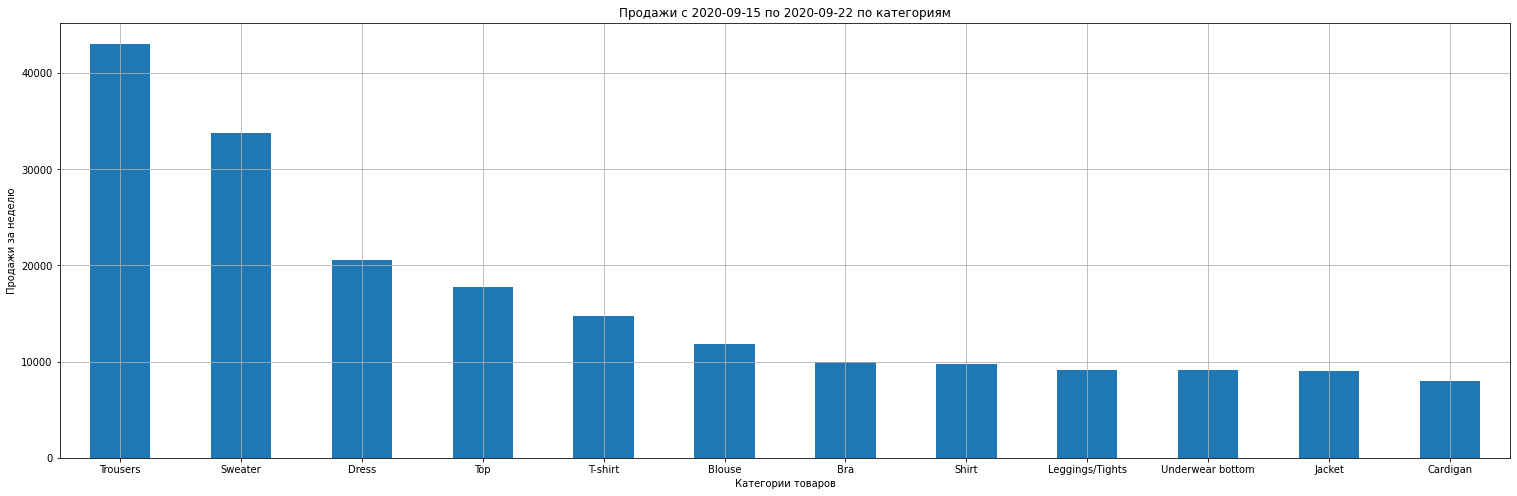

In [159]:
by_category('2020-09-15')

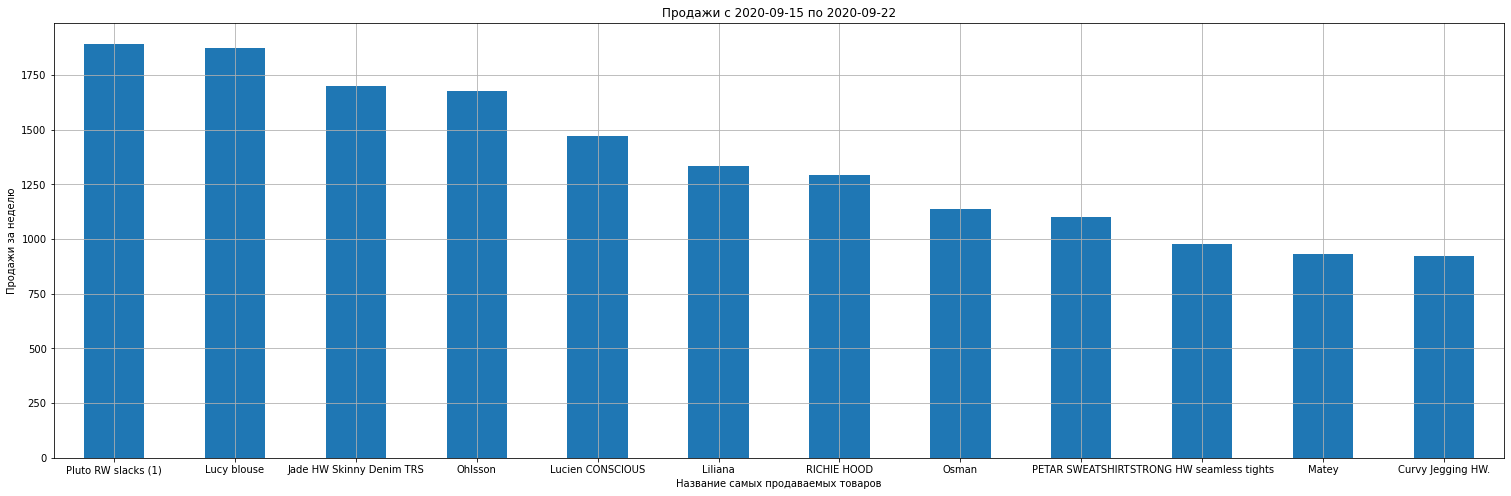

In [160]:
by_name('2020-09-15')

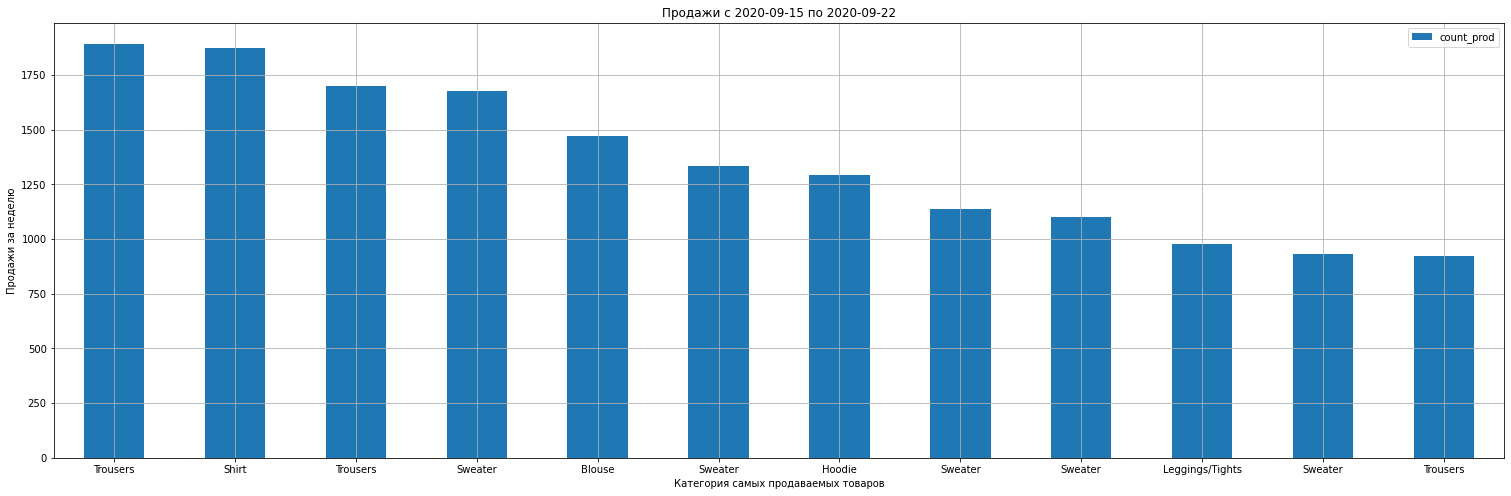

In [161]:
by_name_category('2020-09-15')

### second week

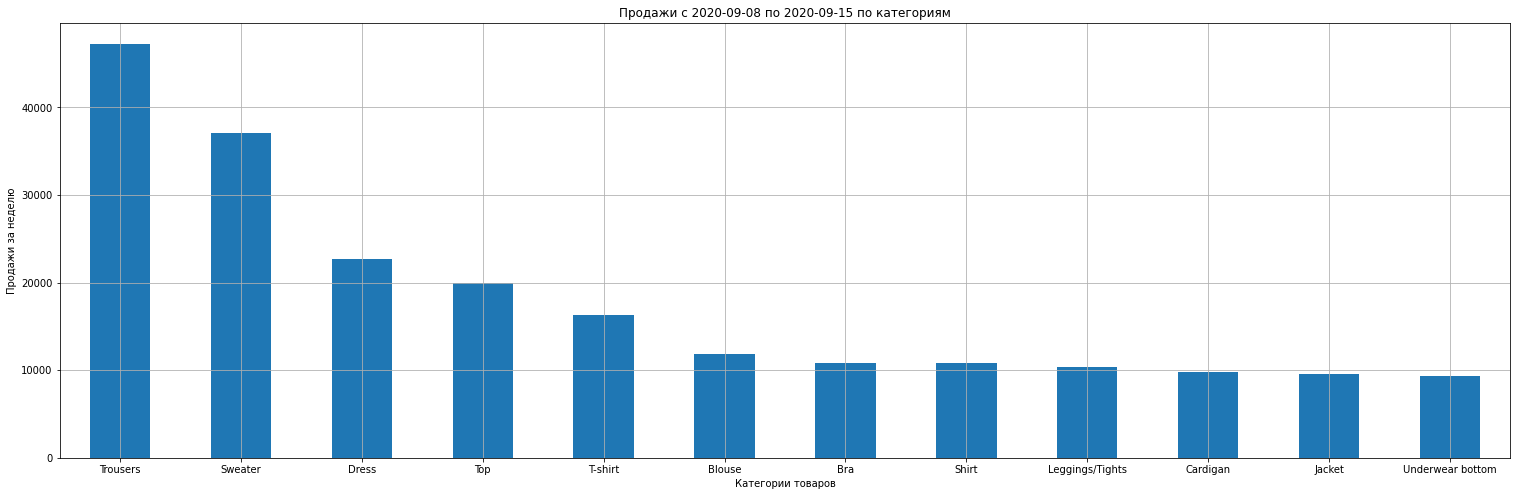

In [162]:
by_category('2020-09-08')

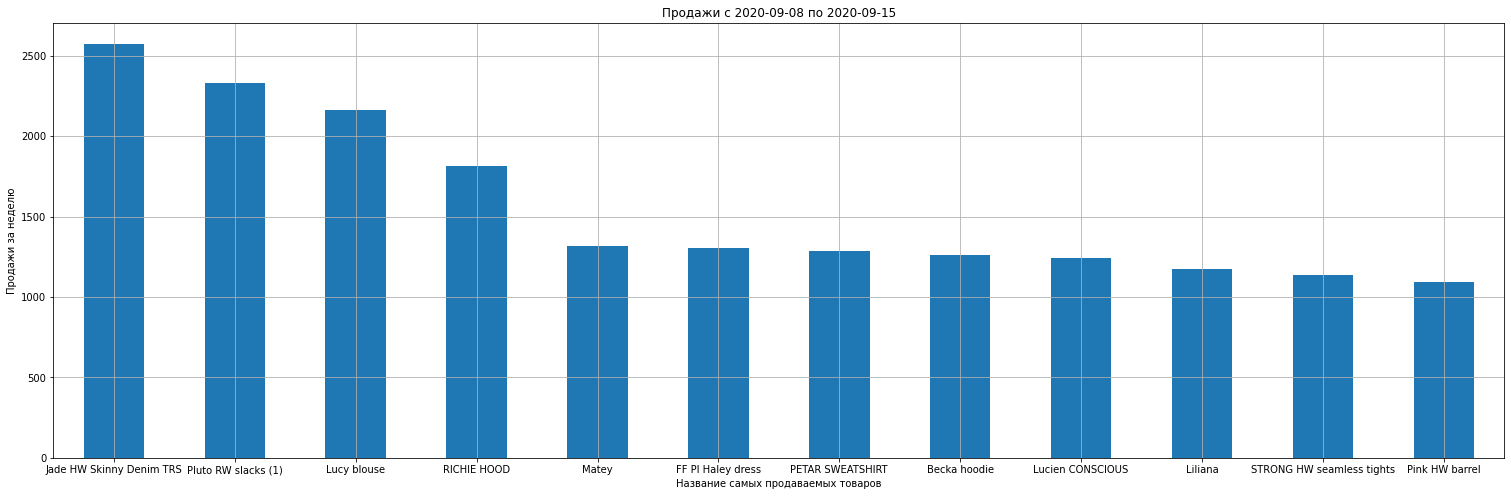

In [163]:
by_name('2020-09-08')

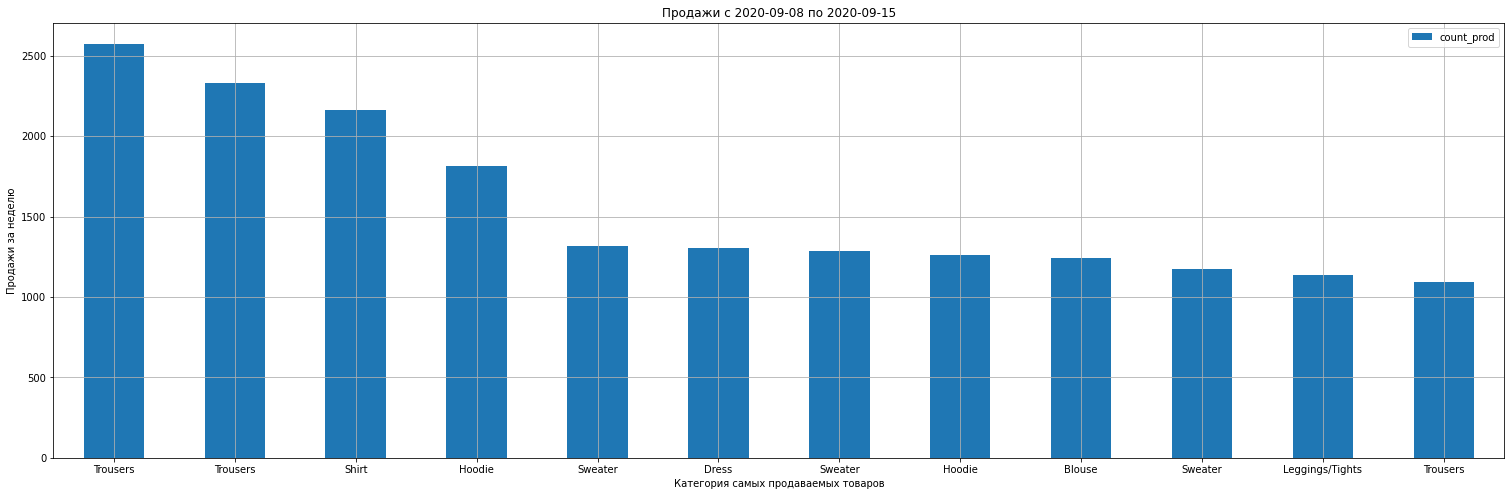

In [164]:
by_name_category('2020-09-08')

### thirth week

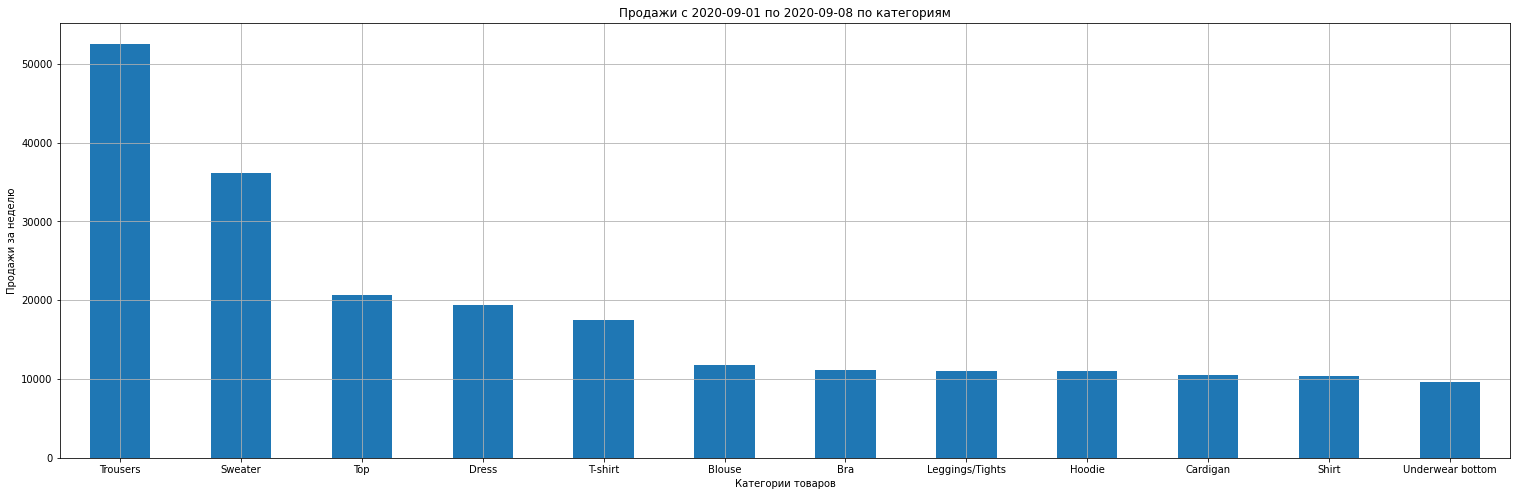

In [165]:
by_category('2020-09-01')

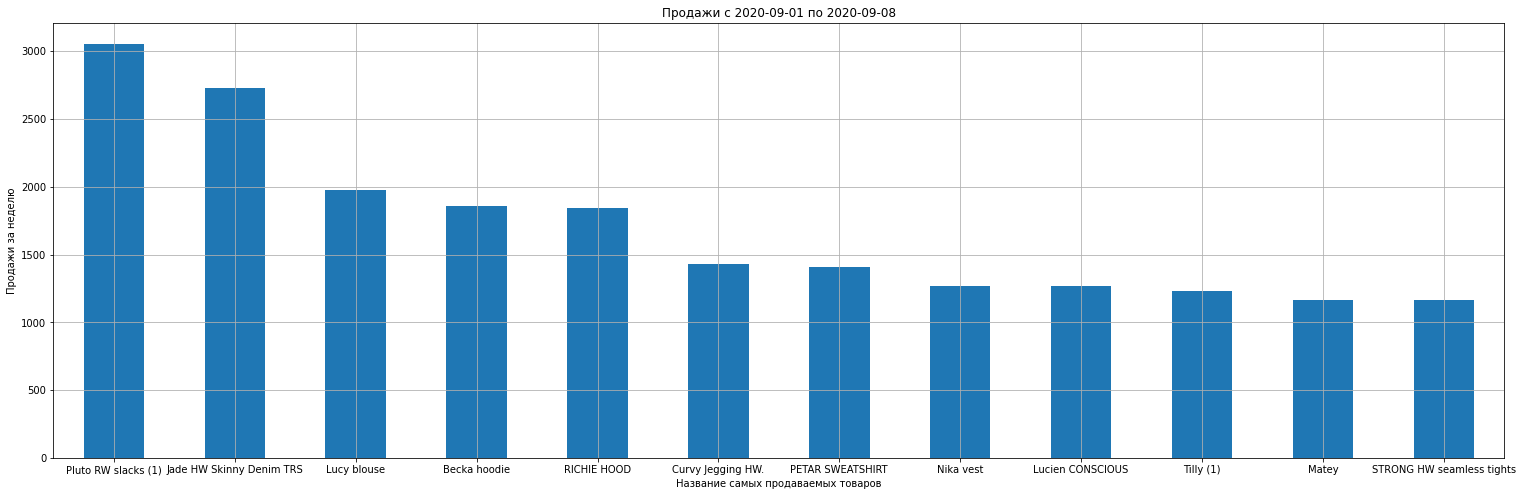

In [166]:
by_name('2020-09-01')

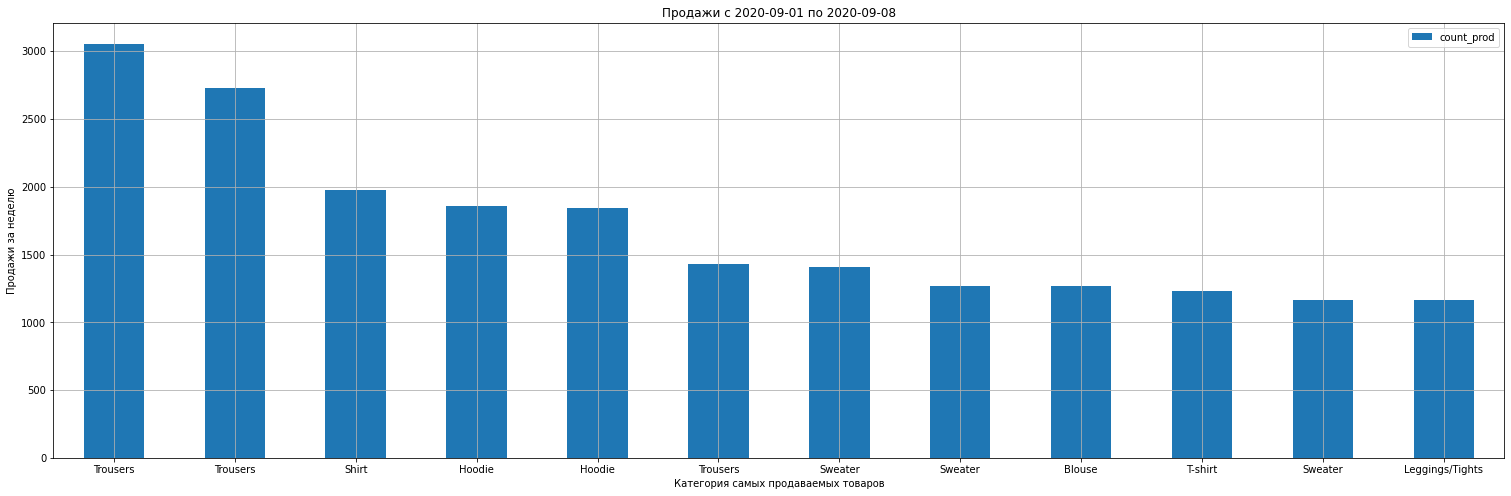

In [167]:
by_name_category('2020-09-01')

### end september

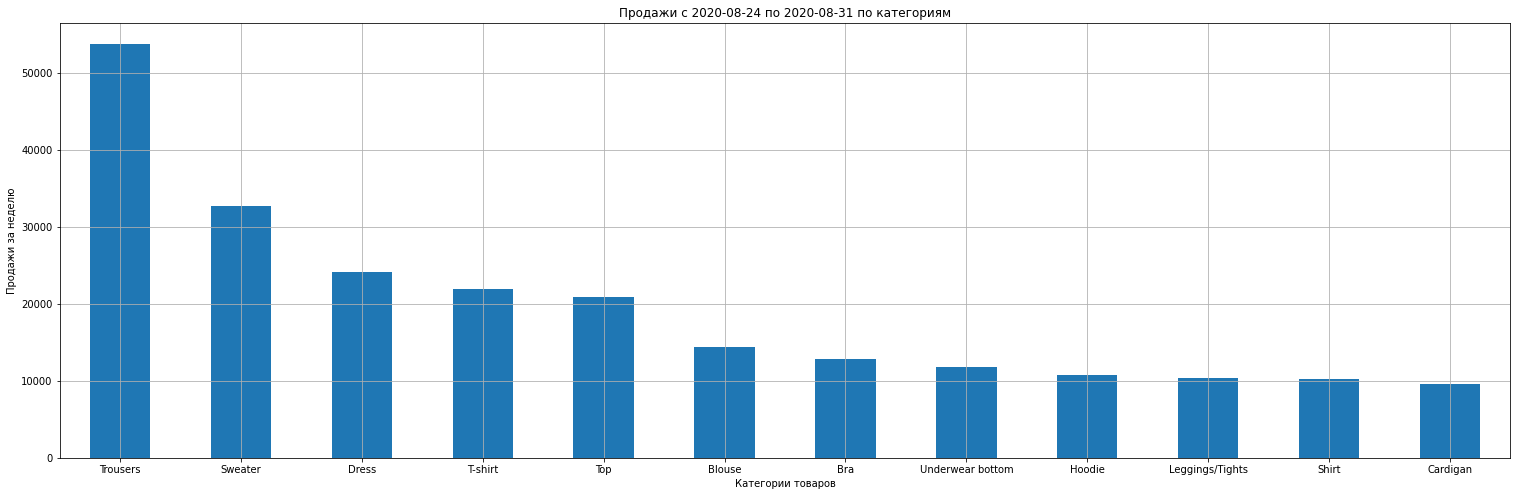

In [168]:
by_category('2020-08-24')